In [1]:
import uproot
import awkward as ak

from hist import Hist

import matplotlib.pylab as plt
import numpy as np

import time

import os


# Copy over files from LTDA

Process the files at LTDA so that we wind up with a bunch of directories that look like

```
SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03  SP-1237-LambdaVeryVeryLoose-Run3-R24a2-v03  SP-3429-LambdaVeryVeryLoose-Run5-R24a2-v03
SP-1005-LambdaVeryVeryLoose-Run2-R24a2-v03  SP-1237-LambdaVeryVeryLoose-Run4-R24a2-v03  SP-3429-LambdaVeryVeryLoose-Run6-R24a2-v03
SP-1005-LambdaVeryVeryLoose-Run3-R24a2-v03  SP-1237-LambdaVeryVeryLoose-Run5-R24a2-v03  SP-3981-LambdaVeryVeryLoose-Run1-R24a2-v03
SP-1005-LambdaVeryVeryLoose-Run4-R24a2-v03  SP-1237-LambdaVeryVeryLoose-Run6-R24a2-v03  SP-3981-LambdaVeryVeryLoose-Run2-R24a2-v03
...
```

Under each of those directories is a subdirectory called `bnv_analysis/` and then there are files that look like

```
SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-10.root  SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-26.root
SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-11.root  SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-27.root
SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-12.root  SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-28.root
SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-13.root  SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03-29.root
```

I copy this over to a directory with the name `babar_data/bnv_plambda`.

# Combine the ROOT files into a single file for each SP mode and for each Run

In `BNV_analysis/LTDA_scripts` there is a script called `combine_rootfiles.sh`. Run this script from `babar_data/bnv_plambda`.

```
bash combine_rootfiles.sh SP*
```

**Jan 2, 2024**
When combining I found these files weren't closed or something. 
```
SP-1005-LambdaVeryVeryLoose-Run6-R24a2-v03/bnv_analysis/SP-1005-LambdaVeryVeryLoose-Run6-R24a2-v03-56.root
```


*Warning!* Make sure there is not a lingering '/' at the end of the directory names and make sure there are no lingering `root` files in any of the subdirectories that you don't want combined. 

For Data, do 

```
bash combine_rootfiles.sh LambdaVeryVeryLoose-Run*-v03
```


In [18]:
# We'll only combine some modes since no SP-2400 (Bhabba scattering) events made it through. 

spmodes = ["998", "1005", "1235", "1237", "3429", "3981", "991"]
#spmodes = ["1005"]
#spmodes = ["991"]

# Do this for single runs or all runs
#runs = [1,2,3,4,5,6]
#run_tag = "All_runs"

# Single run
runs = [1]
run_tag = f"Only_Run_{runs[0]}"

# Output directory

#topdir = '/mnt/qnap/'
topdir = '/home/bellis/'

#outdir = '/home/bellis/babar_data/bnv_plambda'
outdir = f'{topdir}/babar_data/bnv_plambda'

if os.path.exists(outdir):
    print(f"{outdir} exists!\n")
else:
    print(f"{outdir} does not exist!!!!!!!!!!!\n")
    print(f"Did you make a typo? Or do you need to create the directory?\n")

#filename_tag = f'{outdir}/Background_SP_modes_{run_tag}'
#filename_tag = f'{outdir}/SP_1005_mode_{run_tag}'
#filename_tag = f'{outdir}/SP_991_mode_{run_tag}'
filename_tag = f'{outdir}/Background_and_signal_SP_modes_{run_tag}'
#filename_tag = f'{outdir}/Signal_SP_mode'

#filename_tag = f'{outdir}/Data_{run_tag}_BLINDED'

print(f"filename_tag: {filename_tag}")

/home/bellis//babar_data/bnv_plambda exists!

filename_tag: /home/bellis//babar_data/bnv_plambda/Background_and_signal_SP_modes_Only_Run_1


# Combine into a set of parqet files with the awkward info

In [19]:
# Helper functions! Should move these into `babar_tools.py`

def get_spmode_from_filename(filename):
    sp = '0'
    if filename.find('SP')>=0:
        sp = filename.split('SP-')[1].split('-')[0]
    else:
        sp = '0'

    return sp

def get_run_from_filename(filename):
    run = filename.split('Run')[1].split('-')[0]
    return run


filename = 'SP-3429-LambdaVeryVeryLoose-Run3-R24a2-v03_COMBINED.root'
spmode = get_spmode_from_filename(filename)
run = get_run_from_filename(filename)

print(f'{filename}')
print(f'SP mode: {spmode}')
print(f'run    : {run}')


filename = 'LambdaVeryVeryLoose-Run1-OnPeak-R24a2-v03_COMBINED.root'
spmode = get_spmode_from_filename(filename)
run = get_run_from_filename(filename)

print(f'{filename}')
print(f'SP mode: {spmode}')
print(f'run    : {run}')


SP-3429-LambdaVeryVeryLoose-Run3-R24a2-v03_COMBINED.root
SP mode: 3429
run    : 3
LambdaVeryVeryLoose-Run1-OnPeak-R24a2-v03_COMBINED.root
SP mode: 0
run    : 1


In [32]:
# Create a list of the filenames for background MC
filenames = []

# Comment this if we only want the signal SP
#'''

for sp in ["998", "1005", "1235", "1237", "3429", "3981"]:
    for run in runs:
        filenames.append(f'bnv_plambda/SP-{sp}-LambdaVeryVeryLoose-Run{run}-R24a2-v03_COMBINED.root')

for sp in ["991"]:
    for run in runs:
        filenames.append(f'bnv_plambda/SP-{sp}-Run{run}-R24_COMBINED.root')


print(filenames)
print()
print(len(filenames))
#'''

['bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-1235-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-1237-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-3429-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-3981-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-991-Run1-R24_COMBINED.root']

7


In [33]:
# Just for signal SP
# Do this when we want to add in the signal MC
#'''
filenames += [f'{topdir}/babar_data/bnv_plambda/btaoutput_bnv_plam1.root']

#filename_tag = '
#filename_tag = f'{outdir}/Signal_SP_mode'

print(f"filename_tag: {filename_tag}")

print(filenames)
print()
print(len(filenames))
#'''

filename_tag: /home/bellis//babar_data/bnv_plambda/Background_and_signal_SP_modes_Only_Run_1
['bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-1235-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-1237-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-3429-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-3981-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root', 'bnv_plambda/SP-991-Run1-R24_COMBINED.root', '/home/bellis//babar_data/bnv_plambda/btaoutput_bnv_plam1.root']

8


In [34]:
# For Data
'''
filenames = []

for run in runs:
    filenames.append(f'bnv_plambda/LambdaVeryVeryLoose-Run{run}-OnPeak-R24a2-v03_COMBINED.root')


print(filenames)
print()
print(len(filenames))
'''

"\nfilenames = []\n\nfor run in runs:\n    filenames.append(f'bnv_plambda/LambdaVeryVeryLoose-Run{run}-OnPeak-R24a2-v03_COMBINED.root')\n\n\nprint(filenames)\nprint()\nprint(len(filenames))\n"

In [35]:
#'''
start = time.time()

first_time = 1
datadict = {}

sp = None
run = None


# Start looping over the filenames
for filename in filenames:
    
    sp = None
    run = None

    if filename.find('bta')>=0:
        sp = '-999'
        run = '-1'
    else:
        sp = get_spmode_from_filename(filename)
        run = get_run_from_filename(filename)
        
    f = uproot.open(filename)
    if 'ntp1;1' not in list(f.keys()):
        continue
    
    t = f['ntp1']
    nentries = len(t['nB'].array())
    print(f"{sp:5s} {run:2s} {nentries:8d} {filename}")

    # The first time through, we build the dictionary
    for key,value in t.items():
        if first_time:
            datadict[key] = value.array()
        else:
            datadict[key] = ak.concatenate([datadict[key], value.array()])

        
    # Add in values that are specific to the sp/run/mc or data
    if first_time:
        x = (int(sp)*np.ones(nentries,dtype=int)).astype(str)
        datadict['spmode'] = x
        #x = np.ones(nentries,dtype=int)
        #datadict['isMC'] = x
        x = int(run)*np.ones(nentries,dtype=int)
        datadict['run'] = x

    else:
        x = (int(sp)*np.ones(nentries,dtype=int)).astype(str)
        datadict['spmode'] = ak.concatenate([datadict['spmode'], x])
        #x = np.ones(nentries,dtype=int) 
        #datadict['isMC'] = ak.concatenate([datadict['isMC'], x])
        x = int(run)*np.ones(nentries,dtype=int)
        datadict['run'] = ak.concatenate([datadict['run'], x])
  
    first_time = 0
    print(f"Cumulative time... {time.time() - start:.2f} s\n")

print(f"Took {time.time() - start:.2f} s to combine files to parquet")

start = time.time()

# Create the awkward array out of the dictionary
alldata = ak.Array(datadict)


print(f"Took {time.time() - start:.2f} s to turn the dictionary into an awkward array")

#alldata

start = time.time()

# Let's blind the data
if sp=='0':
    mes = alldata['BpostFitMes']
    de  = alldata['BpostFitDeltaE']

    blinding_mask = (mes>5.27) & ((de>-.07) & (de<.07))

    output = ""
    for f in alldata.fields:
        if f.find('Lambda0')==0 or f[0]=='B':
            #print(f)
            if len(output)<80:
                output = f"{output} {f:20s}"
            else:
                print(output)
                output = f"{f:20s}"
            alldata[f] = alldata[f][~blinding_mask]
    print(output)
    
#ak.to_parquet(alldata[~blinding_mask], f'{filename_tag}.parquet')
ak.to_parquet(alldata, f'{filename_tag}.parquet')

print(f"Took {time.time() - start:.2f} s to write the file to a parquet file")


998   1     25647 bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Cumulative time... 5.42 s

1005  1     15863 bnv_plambda/SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Cumulative time... 9.83 s

1235  1       232 bnv_plambda/SP-1235-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Cumulative time... 11.40 s

1237  1       132 bnv_plambda/SP-1237-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Cumulative time... 12.91 s

3981  1        20 bnv_plambda/SP-3981-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Cumulative time... 13.61 s

991   1        49 bnv_plambda/SP-991-Run1-R24_COMBINED.root
Cumulative time... 14.26 s

-999  -1    59633 /home/bellis//babar_data/bnv_plambda/btaoutput_bnv_plam1.root
Cumulative time... 19.15 s

Took 19.15 s to combine files to parquet
Took 0.02 s to turn the dictionary into an awkward array
Took 10.31 s to write the file to a parquet file


In [36]:
# For testing

'''
for f in alldata.fields:
    if f.find('Lambda0')==0 or f[0]=='B':
        print(f)
        alldata[f] = alldata[f][~blinding_mask]
'''
;

''

In [37]:
#!ls -ltr /mnt/qnap/babar_data/bnv_plambda/ | tail
!ls -ltr .//bnv_plambda/ | tail

-rw-r--r-- 1 bellis bellis 1004876588 Jan  2 00:47 SP-998-LambdaVeryVeryLoose-Run5-R24a2-v03_COMBINED.root
-rw-r--r-- 1 bellis bellis  231068637 Jan  2 00:47 LambdaVeryVeryLoose-Run2-OnPeak-R24a2-v03_COMBINED.root
-rw-r--r-- 1 bellis bellis  122240165 Jan  2 00:48 LambdaVeryVeryLoose-Run3-OnPeak-R24a2-v03_COMBINED.root
-rw-r--r-- 1 bellis bellis        583 Jan  2 00:48 LambdaVeryVeryLoose-Run4-OnPeak-R24a2-v03_COMBINED.root
-rw-r--r-- 1 bellis bellis        583 Jan  2 00:48 LambdaVeryVeryLoose-Run5-OnPeak-R24a2-v03_COMBINED.root
-rw-r--r-- 1 bellis bellis        583 Jan  2 00:48 LambdaVeryVeryLoose-Run6-OnPeak-R24a2-v03_COMBINED.root
drwxr-xr-x 2 bellis bellis       4096 Jan  2 00:51 ZOMBIE_ROOT_FILES
-rw-r--r-- 1 bellis bellis   66885368 Jan  2 00:51 LambdaVeryVeryLoose-Run1-OnPeak-R24a2-v03_COMBINED.root
-rw-r--r-- 1 bellis bellis  206657824 Jan  2 00:53 Signal_SP_mode.parquet
-rw-r--r-- 1 bellis bellis  339725972 Jan  2 01:19 Background_and_signal_SP_modes_Only_Run_1.parquet


# Test it out


In [40]:
print(f"Opening {filename_tag}.parquet")

filename = f'{filename_tag}.parquet'
#filename = f'bnv_plambda/Background_SP_modes_Only_Run_1.parquet'

start = time.time()

data = ak.from_parquet(filename)

print(f"Took {time.time() - start} s")

Opening /home/bellis//babar_data/bnv_plambda/Background_and_signal_SP_modes_Only_Run_1.parquet
Took 0.8110394477844238 s


(-0.5, 0.5)

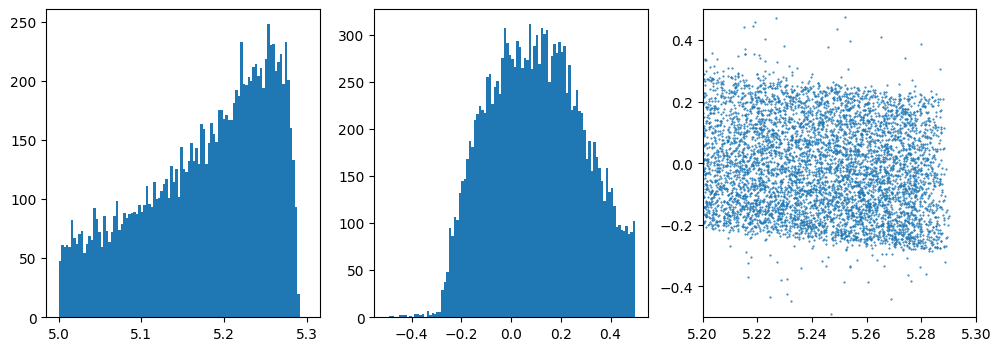

In [46]:
mask = data['spmode'] == '998'
#mask = data['spmode'] == '991'
#mask = data['spmode'] == '-999'

# SP
#mask = mask & (data['Lambda0FlightLen'][:,0] > 1)
#x = data[mask]['BpostFitMes'][:,0]
#y = data[mask]['BpostFitDeltaE']#[:,0]

# Data
mask_lamfl = data['Lambda0FlightLen'] > 1
x = ak.flatten(data[mask]['BpostFitMes'][mask_lamfl[mask]])
y = ak.flatten(data[mask]['BpostFitDeltaE'][mask_lamfl[mask]])



plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(x,bins=100,range=(5,5.3));

plt.subplot(1,3,2)
plt.hist(y,bins=100,range=(-0.5, 0.5));

plt.subplot(1,3,3)
plt.plot(x,y,'.',markersize=1)
plt.xlim(5.2,5.3)
plt.ylim(-0.5,0.5)


In [47]:
h = Hist.new.Reg(100, 5.2, 5.3, name="BpostFitMes", label=r"M$_{ES}$ [GeV/c$^2$]") \
         .StrCat([], name="SP", label="SP modes", growth=True)\
         .StrCat([], name="cuts", label="Cuts", growth=True)\
         .Weight()


bkg_spmodes = ['998','1005', '1235', '1237', '991']
spmodes = bkg_spmodes + ['-999']
#spmodes = ['991']

for spmode in spmodes:
    mask = data.spmode == spmode
    x = data[mask]['BpostFitMes'][:,0]

    weight = 1
    if spmode == '-999':
        weight = 0.1
    
    h.fill(BpostFitMes=x, SP=spmode, cuts=f"0", weight=weight)

/home/bellis/micromamba/envs/pyhep311/lib/python3.11/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


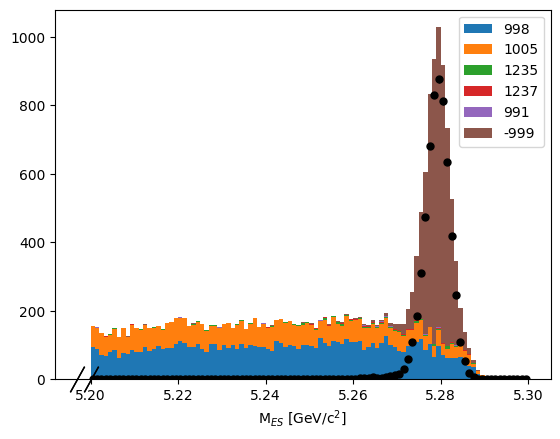

In [48]:
#h[:,['998','1005'],:].stack('SP')[:].project('BpostFitMes').plot(stack=True, histtype="fill")

h[:,:,:].stack('SP')[:].project('BpostFitMes').plot(stack=True, histtype="fill")
h[:,['-999'],:].project('BpostFitMes').plot(histtype="errorbar", color='black')

plt.legend()


In [49]:
# Testing

#f = uproot.open('/home/bellis/BaBar_analyses/BNV_pLambda/bnv_plambda/SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root')
#f